In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [16]:
print(torch.__version__)

2.5.1


In [17]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = "cpu"
print(f"Using Device: {device}")

Using Device: mps


In [18]:
m = 0.7
c = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = m * X + c
print("Shape of X = ", X.shape)
print("Shape of y = ", y.shape)



Shape of X =  torch.Size([50, 1])
Shape of y =  torch.Size([50, 1])


In [19]:
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([40, 1]) torch.Size([40, 1])
torch.Size([10, 1]) torch.Size([10, 1])


In [20]:
def plot_data(X_train = X_train, y_trai = y_train, X_test = X_test, y_test = y_test, predictions = None):

    plt.figure(figsize=(8,6))
    plt.scatter(X_train, y_train, c = 'b', s=10, label='Training Data')
    plt.scatter(X_test, y_test, c = 'r', s=10, label='Testing Data')

    if predictions is not None:
        plt.scatter(X_test, predictions, c = 'g', s=10, label='Predicted Data')
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("Scatter Plot of X and Y")

    
    

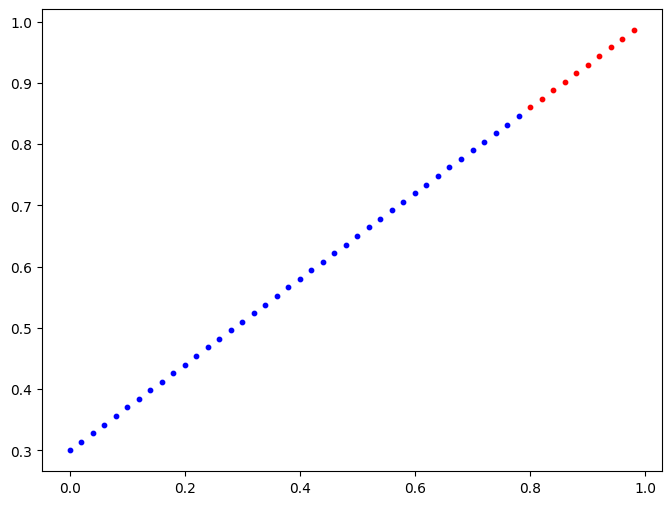

In [21]:
plot_data()

In [22]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights*x + self.bias

In [23]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

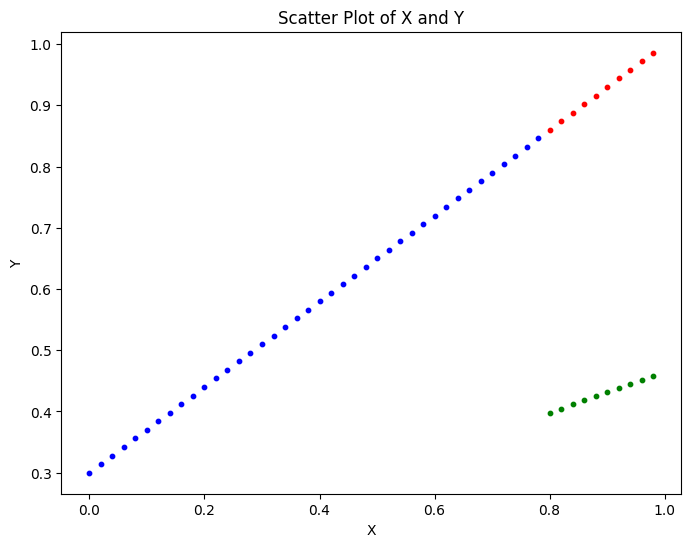

In [24]:
with torch.inference_mode():
    y_pred = model_0(X_test)
plot_data(predictions=y_pred)    

In [25]:
# Set up loss function and optimizer
loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(
    params= model_0.parameters(), lr= 0.1
)

In [26]:
model_0.to(device)
next(model_0.parameters()).device

device(type='mps', index=0)

In [27]:
# training loop
epochs = 500
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

trainLossList = []
testLossList = []
for epoch in range(epochs):
    #1 Forward Pass
    y_pred = model_0(X_train)

    #2 Calculate Training Loss
    loss = loss_fn(y_train, y_pred)

    #3 Zero Grad Optimizer
    optimizer.zero_grad()

    #4 Loss Backward
    loss.backward()

    #5 Step Optimizer
    optimizer.step()

    ### Testing
    with torch.inference_mode():
        test_preds = model_0(X_test)

        test_loss = loss_fn(y_test, test_preds)

    if epoch%10 == 0:
        print(f"Epoch: {epoch} | Training Loss: {loss:.4f} | Test Loss: {test_loss:.4f}")

        trainLossList.append(loss.cpu().detach().numpy())
        testLossList.append(test_loss.cpu().detach().numpy())



Epoch: 0 | Training Loss: 0.1049 | Test Loss: 0.1659
Epoch: 10 | Training Loss: 0.0033 | Test Loss: 0.0170
Epoch: 20 | Training Loss: 0.0023 | Test Loss: 0.0104
Epoch: 30 | Training Loss: 0.0019 | Test Loss: 0.0084
Epoch: 40 | Training Loss: 0.0016 | Test Loss: 0.0070
Epoch: 50 | Training Loss: 0.0013 | Test Loss: 0.0058
Epoch: 60 | Training Loss: 0.0011 | Test Loss: 0.0048
Epoch: 70 | Training Loss: 0.0009 | Test Loss: 0.0040
Epoch: 80 | Training Loss: 0.0008 | Test Loss: 0.0033
Epoch: 90 | Training Loss: 0.0006 | Test Loss: 0.0028
Epoch: 100 | Training Loss: 0.0005 | Test Loss: 0.0023
Epoch: 110 | Training Loss: 0.0004 | Test Loss: 0.0019
Epoch: 120 | Training Loss: 0.0004 | Test Loss: 0.0016
Epoch: 130 | Training Loss: 0.0003 | Test Loss: 0.0013
Epoch: 140 | Training Loss: 0.0003 | Test Loss: 0.0011
Epoch: 150 | Training Loss: 0.0002 | Test Loss: 0.0009
Epoch: 160 | Training Loss: 0.0002 | Test Loss: 0.0008
Epoch: 170 | Training Loss: 0.0001 | Test Loss: 0.0006
Epoch: 180 | Training

TypeError: can't convert mps:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

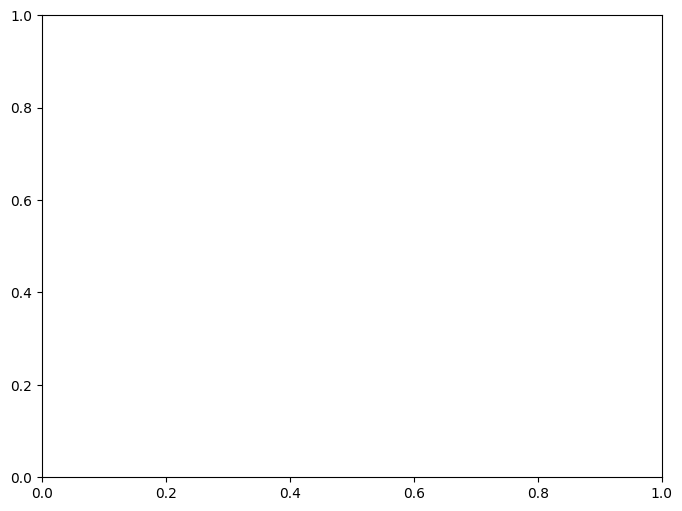

In [29]:
with torch.inference_mode():
    y_pred = model_0(X_test)
plot_data(predictions=y_pred.cpu())